<a href="https://colab.research.google.com/github/jinsyabeycg/BITS-AIML-Mtech-V2/blob/master/Group124_MAB_Clinical_Trial_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `---------------Mandatory Information to fill------------`

### Group ID: Group_124
### Group Members Name with Student ID:
1. Nimishkumar Patel
2. Jinsy Abey - 2024AA05223
3. Sunil Pandey
4. Ayan Deb


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Scenario

A pharmaceutical company is conducting clinical trials to evaluate the effectiveness of three antiretroviral drug combinations for treating HIV-positive patients. Due to the ethical and cost constraints of clinical trials, it is critical to identify the most effective treatment regimen using the least number of patients. Each treatment (or “arm”) can lead to different outcomes depending on patient responses. The effectiveness of each treatment is evaluated using a reward function derived from the improvement in patients’ immune system markers and survival status.



# Problem Definition

You are provided with a clinical dataset where each record corresponds to a patient, including the treatment they received and the resulting health outcomes. Your task is to simulate a clinical trial environment using various MAB strategies to sequentially recommend treatments and observe outcomes. The objective is to maximize the overall success rate across trials by identifying and favouring the most effective treatment.



# Dataset

You will be provided a dataset containing the following fields:

* ***Age (age)***: Patient's age in years at baseline.
* ***Weight (wtkg)***: Continuous feature representing weight in kilograms at baseline.
* ***Gender (gender)***: Binary indicator of gender (0 = Female, 1 = Male).
* ***CD4 Counts (cd40, cd420)***: Integer values representing CD4 counts at baseline and 20+/-5 weeks.
* ***Treatment Indicator (trt)***: Categorical feature indicating the type of treatment received (0 = ZDV only, 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only).
* ***Censoring Indicator (label)***: Binary indicator (1 = failure, 0 = censoring) denoting patient status.


***Link for accessing dataset:***
https://drive.google.com/file/d/1LYfIrJ4VEEGeyOsSt_qoLk7FaAv5Jfx-/view?usp=sharing


# Environment Setup

***Arms (Actions):*** The treatment types (trt)
* Arm 0: ZDV only
* Arm 1: ZDV + ddI
* Arm 2: ZDV + Zal
* Arm 3: ddI only


**Reward Function:**

Reward `r` is defined as:

`r = 1, if (label == 0) and (cd420 > cd40)`

`r = 0, otherwise`


  
This reward represents a successful treatment outcome as an increase in CD4 count and survival.

**Assumptions:**

*Number of Iterations:* Run the simulation for at least 1000 trials (iterations), with the option to extend the number of trials depending on the convergence behavior or observed reward trends. In each iteration, simulate one patient trial using one of the bandit policies.


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [2]:
# Constants and Imports

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt


# Load Dataset (0.5M)

In [3]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------

df = pd.read_csv('Clinical_Trial.csv')

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     2139 non-null   int64  
 1   wtkg    2139 non-null   float64
 2   gender  2139 non-null   int64  
 3   cd40    2139 non-null   int64  
 4   cd420   2139 non-null   int64  
 5   trt     2139 non-null   int64  
 6   label   2139 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 117.1 KB
None
   age     wtkg  gender  cd40  cd420  trt  label
0   48  89.8128       0   422    477    2      0
1   61  49.4424       0   162    218    3      1
2   45  88.4520       1   326    274    3      0
3   47  85.2768       1   287    394    3      0
4   43  66.6792       1   504    353    0      0


# Design a Clinical Trial Environment (0.5M)

In [4]:
# Code for environment setup along with reward function
#-----write your code below this line---------

class ClinicalTrialEnvironment:


  cum_rewards_random = []
  cum_rewards_greedy = []
  cum_rewards_epsilon = []
  cum_rewards_ucb = []

  # Reward function
  def calculate_reward(data):
    return 1 if (data['label'] == 0) and (data['cd420'] > data['cd40']) else 0


  df['reward'] = df.apply(calculate_reward, axis=1)

  # Normalize features (optional for contextual bandits)
  scaler = StandardScaler()
  features = ['age', 'wtkg', 'cd40']
  df[features] = scaler.fit_transform(df[features])
  print(df['trt'].nunique())

4


# Using Random Policy (0.5M)
Implement a random policy for treatment selection and print each 100th iteration. (Mandatory)

In [5]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------
def random_policy() :
  # Number of arms (treatments)
  n_arms = df['trt'].nunique()

  # Simulation parameters
  n_trials = 1000
  cumulative_rewards = []
  cum_rewards_random = []
  arm_counts = np.zeros(n_arms)

  for trial in range(n_trials):
    # Randomly select an arm
    selected_arm = np.random.choice(n_arms)

    # Randomly sample a patient who received this treatment
    patient = df[df['trt'] == selected_arm].sample(1)
    reward = patient['reward'].values[0]

    cumulative_rewards.append(reward)
    arm_counts[selected_arm] += 1

    if(trial % 100 == 0):
      print(f"Iteration {trial}: Selected Arm {selected_arm}, Reward {sum(cumulative_rewards)}")
      cum_rewards_random.append(sum(cumulative_rewards))

  return cumulative_rewards, arm_counts, n_trials, cum_rewards_random


cumulative_rewards, arm_counts, n_trials, cum_rewards_random = random_policy()
print("Total Reward:", cumulative_rewards)
print("Arm Selection Counts:", arm_counts)
print("Average Reward per Arm:", arm_counts / n_trials)
print("cum_rewards_random: ", cum_rewards_random)


Iteration 0: Selected Arm 1, Reward 1
Iteration 100: Selected Arm 3, Reward 51
Iteration 200: Selected Arm 2, Reward 92
Iteration 300: Selected Arm 3, Reward 143
Iteration 400: Selected Arm 3, Reward 187
Iteration 500: Selected Arm 0, Reward 239
Iteration 600: Selected Arm 1, Reward 280
Iteration 700: Selected Arm 1, Reward 318
Iteration 800: Selected Arm 3, Reward 358
Iteration 900: Selected Arm 2, Reward 401
Total Reward: [np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0),

# Using Greedy Policy (1M)
Implement the Greedy policy that always selects the treatment with the highest average reward and print each 100th iteration. (Mandatory)

In [6]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------
def greedy_policy() :
  # Number of arms (treatments)
  n_arms = df['trt'].nunique()

  # Simulation parameters
  n_trials = 1000
  cumulative_rewards = []
  cum_rewards_greedy = []
  arm_counts = np.zeros(n_arms)
  greedy_Q = np.zeros(n_arms)
  greedy_N = np.zeros(n_arms)

  for trial in range(n_trials):
    # Select an arm with max Q
    selected_arm = np.argmax(greedy_Q)

    # Randomly sample a patient who received this treatment
    patient = df[df['trt'] == selected_arm].sample(1)
    reward = patient['reward'].values[0]

    greedy_N[selected_arm] += 1
    greedy_Q[selected_arm] += (reward - greedy_Q[selected_arm]) / greedy_N[selected_arm]  # Update average reward
    cumulative_rewards.append(reward)
    arm_counts[selected_arm] += 1

    if(trial % 100 == 0):
      print(f"Iteration {trial}: Selected Arm {selected_arm}, Reward {sum(cumulative_rewards)}")
      cum_rewards_greedy.append(sum(cumulative_rewards))



  return cumulative_rewards, arm_counts, n_trials, cum_rewards_greedy


cumulative_rewards, arm_counts, n_trials, cum_rewards_greedy = greedy_policy()
print("Total Reward:", cumulative_rewards)
print("Arm Selection Counts:", arm_counts)
print("Average Reward per Arm:", arm_counts / n_trials)
print("cum_rewards_greedy: ", cum_rewards_greedy)

Iteration 0: Selected Arm 0, Reward 1
Iteration 100: Selected Arm 0, Reward 32
Iteration 200: Selected Arm 0, Reward 69
Iteration 300: Selected Arm 0, Reward 94
Iteration 400: Selected Arm 0, Reward 126
Iteration 500: Selected Arm 0, Reward 160
Iteration 600: Selected Arm 0, Reward 192
Iteration 700: Selected Arm 0, Reward 226
Iteration 800: Selected Arm 0, Reward 260
Iteration 900: Selected Arm 0, Reward 287
Total Reward: [np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), 

# Using Epsilon-Greedy Policy (1.5M)
Implement the ε-Greedy policy with ε = 0.1, 0.2, 0.5. Report iteration-wise selections and rewards. Determine which ε yields the best result. (Mandatory)

In [7]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------
def epsilon_greedy_policy(epsilon) :
  # Number of arms (treatments)
  n_arms = df['trt'].nunique()

  # Simulation parameters
  n_trials = 1000
  cumulative_rewards = []
  cum_rewards_epsilon = []
  selections = []
  arm_counts = np.zeros(n_arms)
  epsilon_greedy_Q = np.zeros(n_arms)
  epsilon_greedy_N = np.zeros(n_arms)

  for trial in range(n_trials):
    # Select an arm
    if np.random.random() < epsilon:
        selected_arm = np.random.choice(n_arms)  # Exploration
    else:
        selected_arm = np.argmax(epsilon_greedy_Q)  # Exploitation

    # Randomly sample a patient who received this treatment
    patient = df[df['trt'] == selected_arm].sample(1)
    reward = patient['reward'].values[0]

    epsilon_greedy_N[selected_arm] += 1
    epsilon_greedy_Q[selected_arm] += (reward - epsilon_greedy_Q[selected_arm]) / epsilon_greedy_N[selected_arm]  # Update average reward
    cumulative_rewards.append(reward)
    selections.append(selected_arm)
    arm_counts[selected_arm] += 1

    if (trial % 100 == 0):
      cum_rewards_epsilon.append(sum(cumulative_rewards))


  return cumulative_rewards, arm_counts, n_trials, selections, cum_rewards_epsilon

epsilon_values = [0.5, 0.1, 0.2]
cum_rewards_epsilon_01 = []
cum_rewards_epsilon_02 = []
cum_rewards_epsilon_05 = []
for val in epsilon_values:
  print(val)
  cumulative_rewards, arm_counts, n_trials, selections, cum_rewards_epsilon = epsilon_greedy_policy(val)
  print("Epsilon:",  val, "Total Reward:", sum(cumulative_rewards))
  print("Arm Selection Counts:", arm_counts)
  print("Selection: ", selections)
  print("Average Reward per Arm:", arm_counts / n_trials)
  if val == 0.1:
    cum_rewards_epsilon_01 = cum_rewards_epsilon
  elif val == 0.2:
    cum_rewards_epsilon_02 = cum_rewards_epsilon
  else:
    cum_rewards_epsilon_05 = cum_rewards_epsilon

0.5
Epsilon: 0.5 Total Reward: 530
Arm Selection Counts: [123. 628. 128. 121.]
Selection:  [1, 2, 1, 0, np.int64(1), 2, np.int64(1), 0, 1, np.int64(1), 0, np.int64(1), np.int64(1), np.int64(1), np.int64(1), 2, 1, 1, 2, np.int64(1), 2, np.int64(1), 2, 0, 1, 1, np.int64(1), np.int64(1), 1, 0, np.int64(1), 3, np.int64(1), 1, 2, 1, 0, np.int64(1), np.int64(1), np.int64(1), 0, np.int64(1), 0, np.int64(1), np.int64(1), 2, np.int64(1), np.int64(1), 1, np.int64(1), 2, np.int64(1), np.int64(1), 3, 0, 0, 2, 2, np.int64(1), 0, 3, 2, 3, np.int64(1), 3, 1, 3, 0, 1, np.int64(1), 0, np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), 2, np.int64(1), np.int64(1), 2, np.int64(1), np.int64(1), 3, 0, np.int64(1), np.int64(1), np.int64(1), np.int64(1), 1, np.int64(1), np.int64(1), 3, 3, np.int64(1), 0, np.int64(1), np.int64(1), np.int64(1), 2, np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), 2, np.in

# Using UCB (1M)
Implement the UCB algorithm for treatment selection and print each 100th iteration. (Mandatory)

In [8]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------
def ucb() :
  # Number of arms (treatments)
  n_arms = df['trt'].nunique()

  # Simulation parameters
  n_trials = 1000
  cumulative_rewards = []
  cum_rewards_ucb = []
  arm_counts = np.zeros(n_arms)
  arm_values = [0.0] * n_arms

  for trial in range(n_trials):
    # Randomly select an arm
    selected_arm = select_ucb_arm(n_arms, arm_counts, arm_values)

    # Randomly sample a patient who received this treatment
    patient = df[df['trt'] == selected_arm].sample(1)
    reward = patient['reward'].values[0]

    arm_counts[selected_arm] += 1
    n = arm_counts[selected_arm]
    arm_values[selected_arm] = ((n - 1) * arm_values[selected_arm] + reward) / n
    cumulative_rewards.append(reward)

    if(trial % 100 == 0):
      # Results
      print(f"Iteration {trial}: Selected Arm {selected_arm}, Reward {sum(cumulative_rewards)}")
      cum_rewards_ucb.append(sum(cumulative_rewards))


  return cumulative_rewards, arm_counts, arm_values, cum_rewards_ucb

def select_ucb_arm(n_arms, arm_counts, arm_values):
  # Check for unselected arms first
  for arm in range(n_arms):
      if arm_counts[arm] == 0:
          return arm

  # Calculate UCB values for all arms
  total_counts = sum(arm_counts)
  ucb_values = []
  for arm in range(n_arms):
      average_reward = arm_values[arm]
      confidence_bound = math.sqrt((2 * math.log(total_counts)) / arm_counts[arm])
      ucb_values.append(average_reward + confidence_bound)

  return ucb_values.index(max(ucb_values))


cumulative_rewards, arm_counts, arm_values, cum_rewards_ucb = ucb()
print("Total Reward:", cumulative_rewards)
print("Arm Selection Counts:", arm_counts)
print("Average Reward per Arm:", arm_values)
print("cum_rewards_ucb: ", cum_rewards_ucb)

Iteration 0: Selected Arm 0, Reward 1
Iteration 100: Selected Arm 1, Reward 56
Iteration 200: Selected Arm 1, Reward 110
Iteration 300: Selected Arm 3, Reward 152
Iteration 400: Selected Arm 2, Reward 196
Iteration 500: Selected Arm 1, Reward 244
Iteration 600: Selected Arm 2, Reward 295
Iteration 700: Selected Arm 1, Reward 342
Iteration 800: Selected Arm 1, Reward 394
Iteration 900: Selected Arm 3, Reward 444
Total Reward: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0)

# Plot the cumulative rewards for all policies on a single graph to compare their performance. (0.5M)

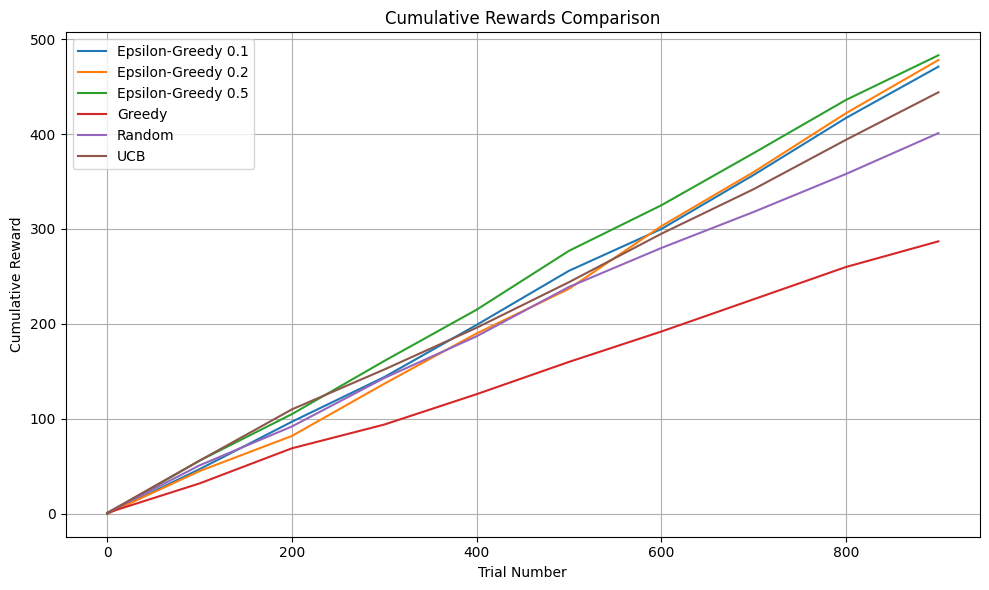

In [9]:
#-----write your code below this line---------
numbers = [x for x in range(0, 950 + 1, 100)]

plt.figure(figsize=(10, 6))
plt.plot(numbers, cum_rewards_epsilon_01, label='Epsilon-Greedy 0.1')
plt.plot(numbers, cum_rewards_epsilon_02, label='Epsilon-Greedy 0.2')
plt.plot(numbers, cum_rewards_epsilon_05, label='Epsilon-Greedy 0.5')
plt.plot(numbers, cum_rewards_greedy, label='Greedy')
plt.plot(numbers, cum_rewards_random, label='Random')
plt.plot(numbers, cum_rewards_ucb, label='UCB')

plt.xlabel('Trial Number')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusion (0.5M)

write a conclusion (approximately 250 words) summarizing which treatment policy was most effective. Discuss the balance between exploration and exploitation in your simulations.

`----write below this line------`